In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data set
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Checking the shape of dataset
df.shape

(284807, 31)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### We will check how our data is distributed with the help of histogram.

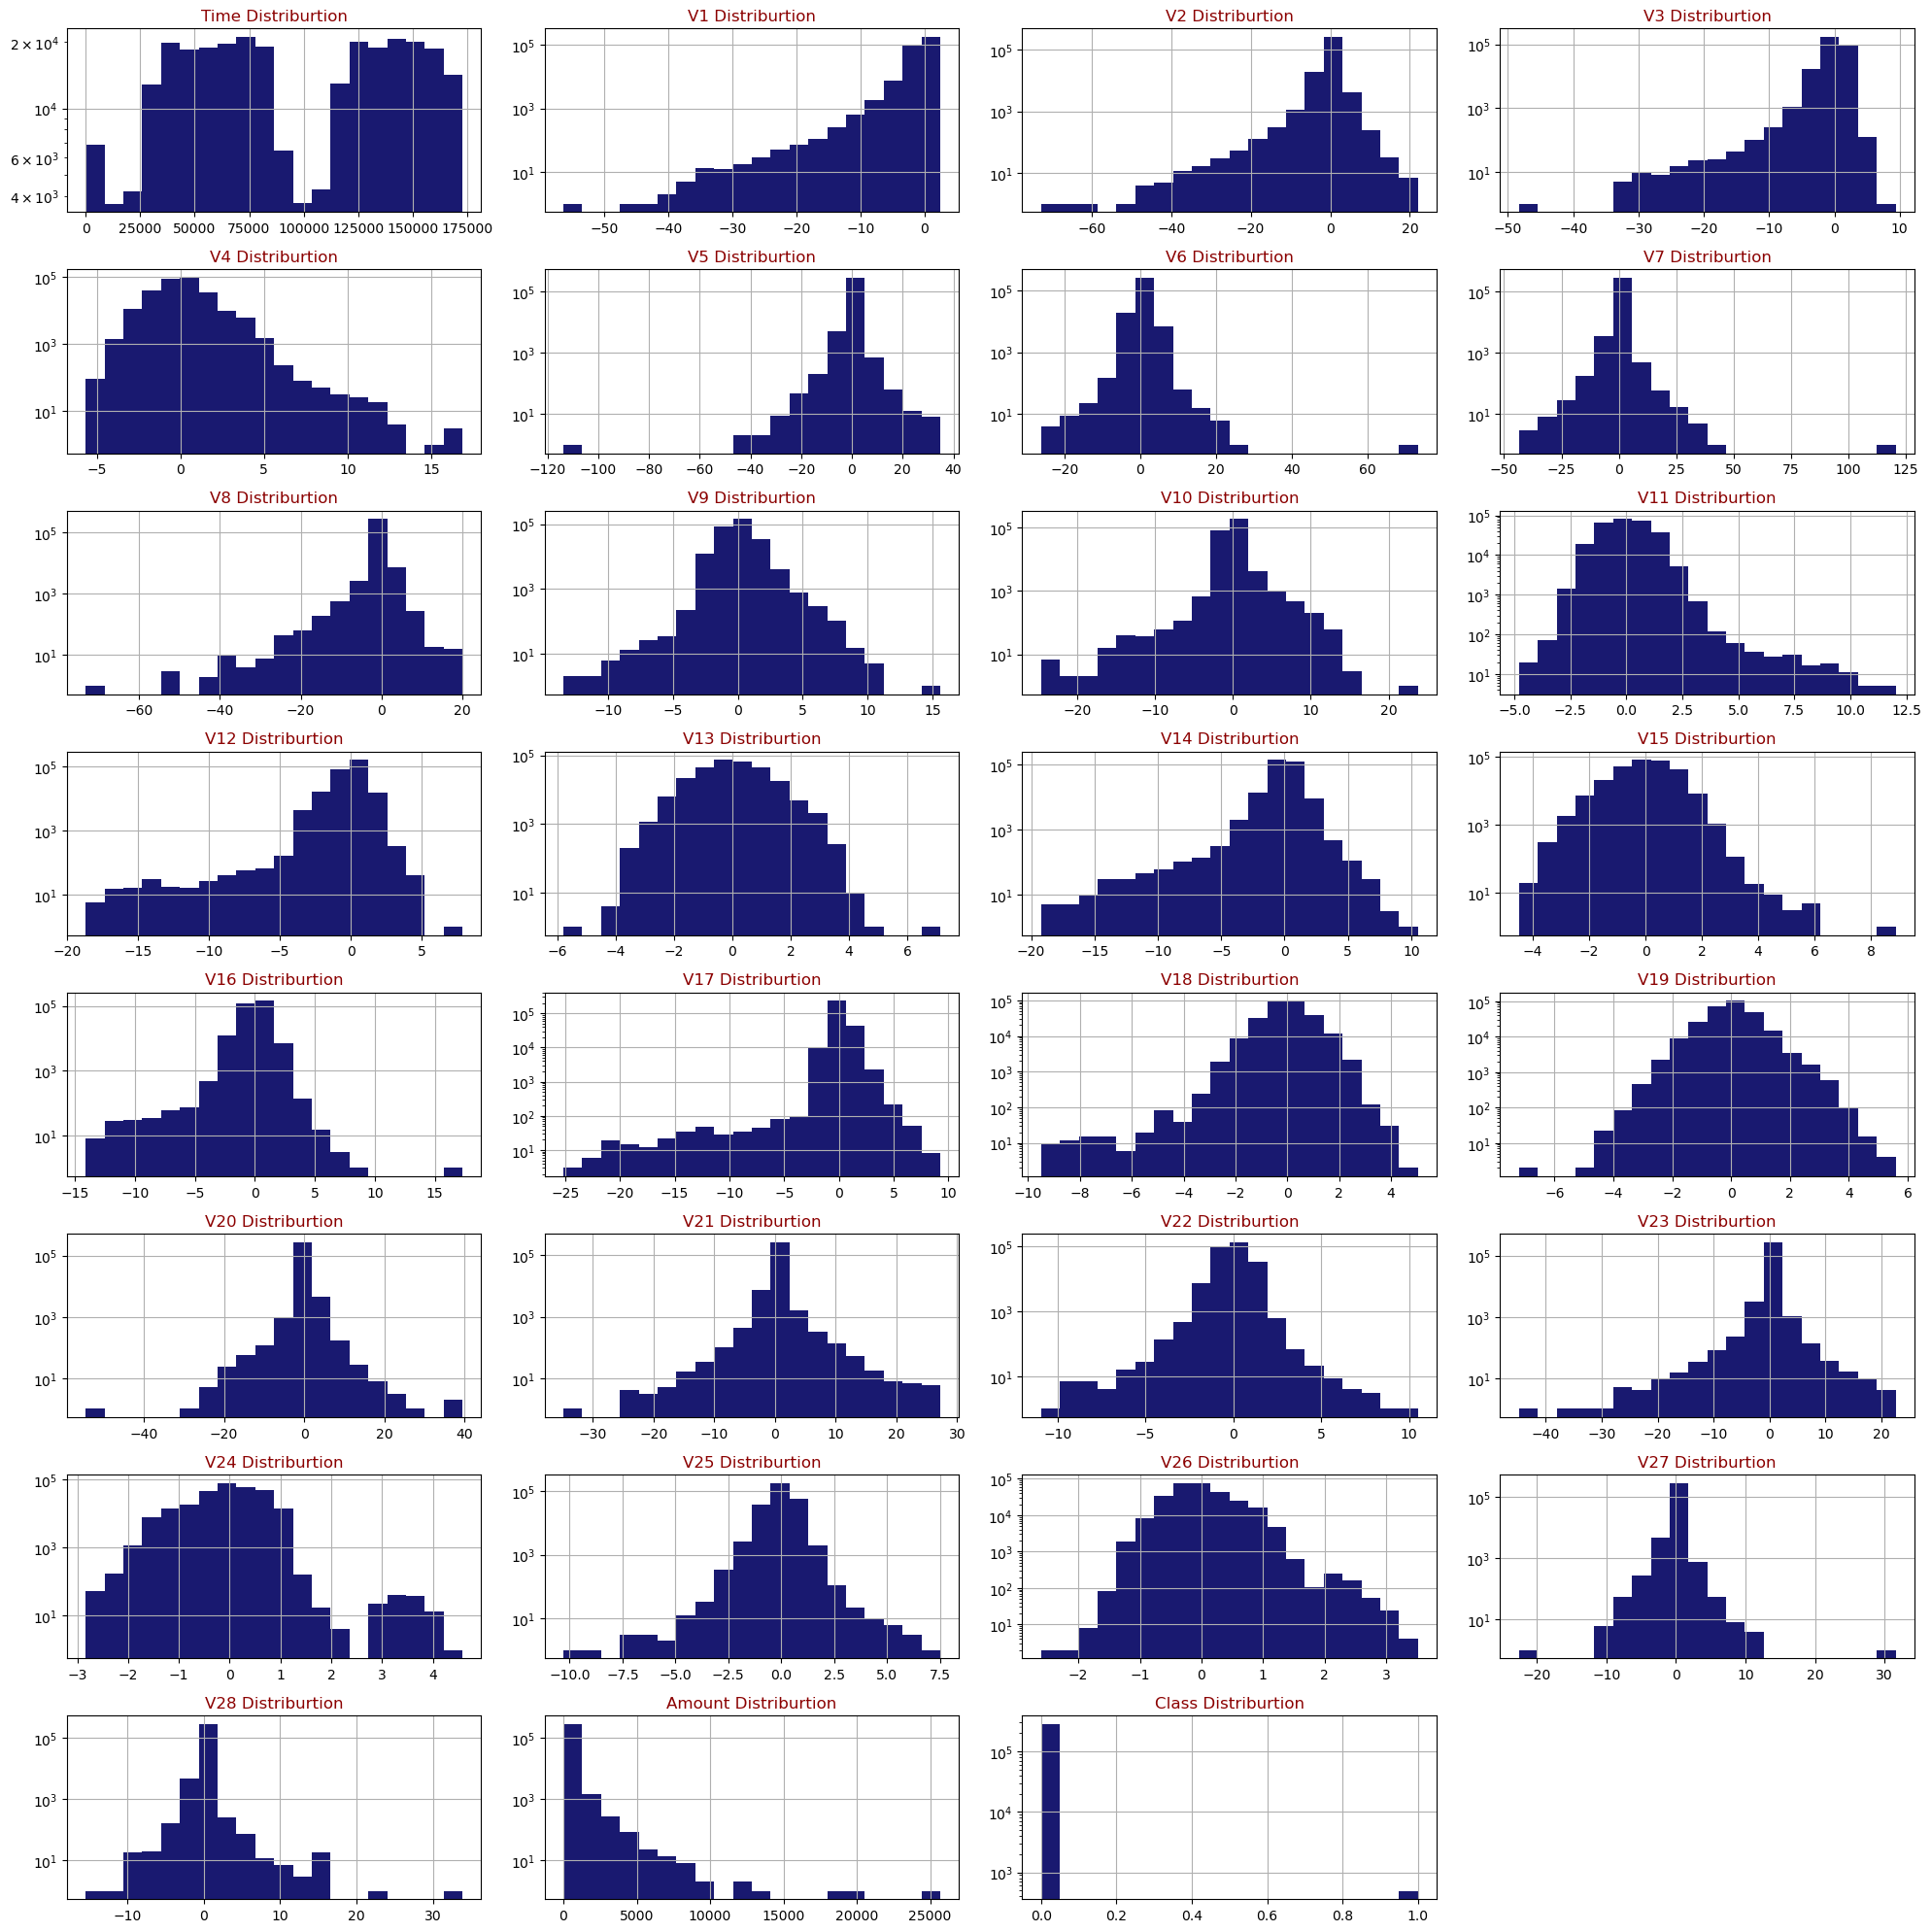

In [5]:
def draw_histogram(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[feature].hist(bins= 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distriburtion", color = 'DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histogram(df, df.columns, 8, 4)    

### Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [6]:
X = df.drop("Class", axis=1)
y = df.Class

### Model Building

### We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model. And, in the same way, a single line of code can fit the model on our data.

### Logistic Regression 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [8]:
log_class = LogisticRegression()
grid = {'C':10.0 **np.arange(-2,3), 'penalty':['l1', 'l2']}
cv = KFold(n_splits = 5, random_state = None, shuffle= False)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [10]:
clf = GridSearchCV(log_class, grid, cv = cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [11]:
y_pred = clf.predict(X_test)

### Checking the confusion matrix:

<AxesSubplot:>

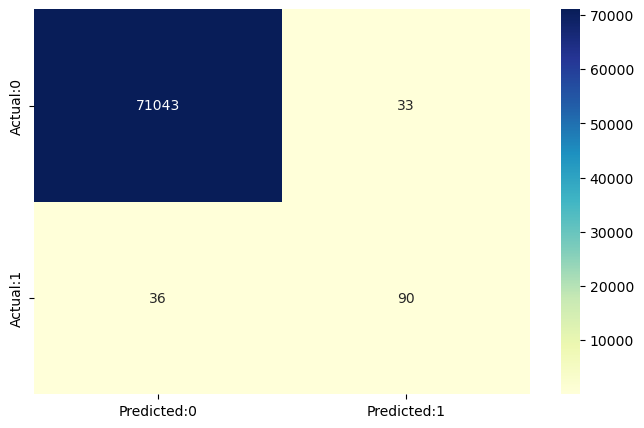

In [12]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

### Checking the accuracy and classification report:

In [13]:
print(accuracy_score(y_test, y_pred))

0.9990309260975815


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.73      0.71      0.72       126

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



### Randome Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10,min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [16]:
y_pred=classifier.predict(X_test)

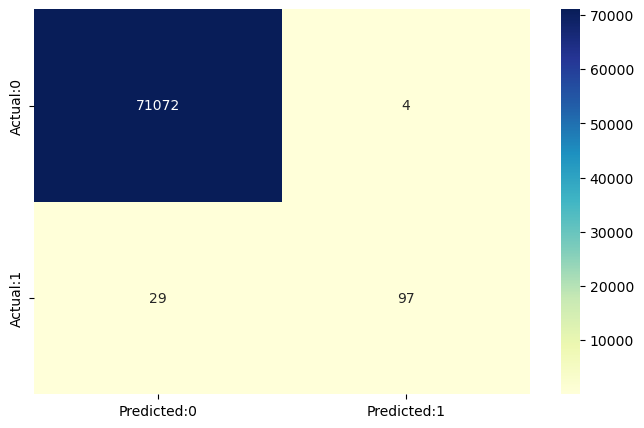

In [17]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap='YlGnBu');

### Checking the accuracy and classification report for Random Forest Classifier:

In [18]:
print(accuracy_score(y_test,y_pred))

0.9995365298727564


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.96      0.77      0.85       126

    accuracy                           1.00     71202
   macro avg       0.98      0.88      0.93     71202
weighted avg       1.00      1.00      1.00     71202



### Random Resampling Imbalanced Datasets

There are two main approaches to random resampling for imbalanced classification; they are oversampling and under sampling.

* Random Oversampling: Randomly duplicate examples in the minority class.

* Random Under sampling: Randomly delete examples in the majority class.

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

In [20]:
from collections import Counter
Counter(y_train)

Counter({0: 213239, 1: 366})

In [21]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
ns = RandomUnderSampler()
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit {}". format(Counter(y_train)))
print("The number of classes after fit {}". format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 213239, 1: 366})
The number of classes after fit Counter({0: 366, 1: 366})


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [23]:
y_pred=classifier.predict(X_test)

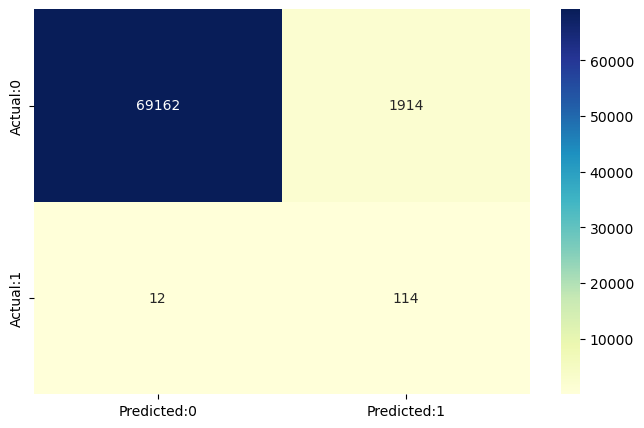

In [24]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu');

In [25]:
print(accuracy_score(y_test,y_pred))

0.9729501980281453


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71076
           1       0.06      0.90      0.11       126

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.98     71202



### CatBoost : Overfit Detector

In [27]:
# map categorical feature
credit_catboost_ready_df = df.dropna()

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


array([], dtype=int64)

In [28]:
SEED = 1234

from catboost import CatBoostClassifier

params = {'iterations' : 5000,
          'learning_rate' : 0.01,
          'cat_features' : card_categories,
          'depth' : 3,
          'eval_metric' : 'AUC',
          'verbose' : 200,
          'od_type' : "Iter" ,
          'od_wait' : 500,
          'random_seed' : SEED
           }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test),
              use_best_model=True,
              plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7423951	best: 0.7423951 (0)	total: 452ms	remaining: 37m 41s
200:	test: 0.9753751	best: 0.9753751 (200)	total: 11.4s	remaining: 4m 32s
400:	test: 0.9817386	best: 0.9817420 (399)	total: 22.3s	remaining: 4m 15s
600:	test: 0.9834026	best: 0.9834552 (595)	total: 37.3s	remaining: 4m 32s
800:	test: 0.9843701	best: 0.9843738 (799)	total: 49.7s	remaining: 4m 20s
1000:	test: 0.9847384	best: 0.9847384 (1000)	total: 1m 1s	remaining: 4m 5s
1200:	test: 0.9850098	best: 0.9850320 (1196)	total: 1m 22s	remaining: 4m 21s
1400:	test: 0.9855978	best: 0.9855978 (1400)	total: 1m 41s	remaining: 4m 20s
1600:	test: 0.9848964	best: 0.9856167 (1404)	total: 1m 54s	remaining: 4m 2s
1800:	test: 0.9843853	best: 0.9856167 (1404)	total: 2m 7s	remaining: 3m 46s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9856166706
bestIteration = 1404

Shrink model to first 1405 iterations.


### AdaBoost Classifier: 

In [29]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',\
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
             'Amount']

In [30]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                        algorithm='SAMME.R',
                        learning_rate=0.8,
                        n_estimators=NUM_ESTIMATORS)

In [31]:
clf.fit(df[predictors],df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [32]:
y_pred = clf.predict(df[predictors])

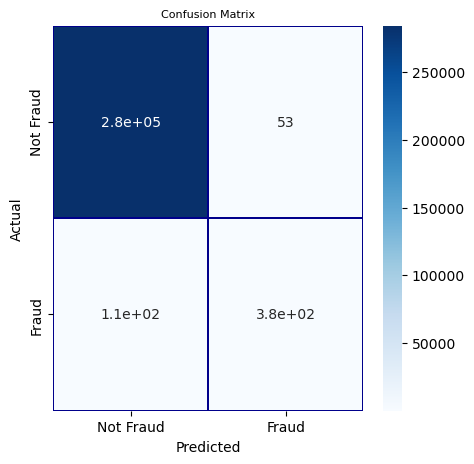

In [33]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
              xticklabels=['Not Fraud', 'Fraud'],
              yticklabels=['Not Fraud', 'Fraud'],
              annot=True,ax=ax1,
              linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [34]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = cat_model.predict(X_test)

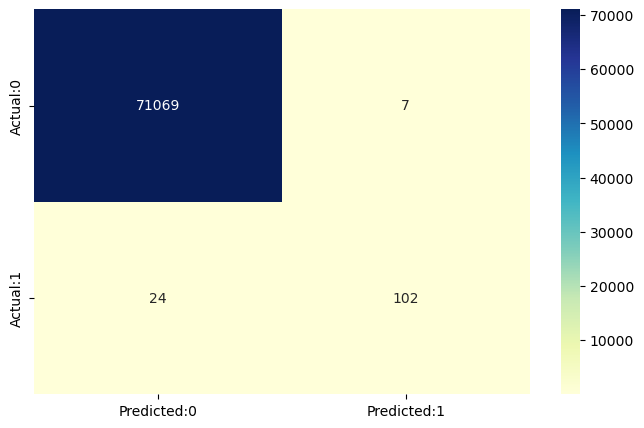

In [35]:
# Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0', 'Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu');

### SMOTE Analysis

In [36]:
from imblearn.combine import SMOTETomek

In [ ]:
os=SMOTETomek(random_state=42)
X_train_ns, y_train_ns=os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns, Y_train_ns)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

### Conclusion

Well, great We just received 99.94% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class.